<a href="https://colab.research.google.com/github/ambideXtrous9/Variational-AutoEncoders-VAE-with-PyTorch/blob/main/Copy_of_VAE_implementation_in_PyTorch_Lightning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# VAE Loss

The loss we'll be implementing for the VAE is called the ELBO.

$$
\color{red}{\min \mathbb{E}_{q}[ \log q(z|x) - \log p(z)]} - \color{blue}{\mathbb{E}_{q} \log p(x|z)}
$$

The first term is the KL-divergence and the second term the reconstruction.

For a full derivation and explanation see the next section

---
# Math

If you don't care about the derivation, please skip this part.

There are 2 ways to derive the VAE loss.
1. Using Jensen's inequality
2. Using KL divergence.

In this tutorial we'll use KL divergence.


## ELBO derivation

### What is the ELBO?
The result of this derivation is a loss called ELBO (evidence lower bound). The ELBO has two terms

Term 1: Reconstruction
$$
- \mathbb{E}_q \log p(x|z)
$$

Term 2: KL divergence
$$
\mathbb{E}_{q}  \log \frac{q(z|x)}{p(z)}
$$

Together, these two terms define the ELBO:

$$
- \mathbb{E}_{q}  \log p(x|z) + \mathbb{E}_{q}  \log \frac{q(z|x)}{p(z)}
$$

### ELBO as a bound
Minimizing KL divergence is equivalent to maximizing ELBO (with some slack).

This means that ELBO is a lowerbound on KL divergence.
Here's a rendering of what we mean by this in abstract terms

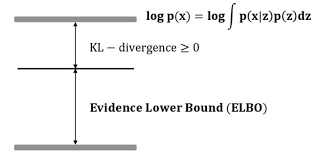

---
### How we get ELBO

Here's how we end up finding the ELBO.

First, remember we want to model a distribution over inputs, $ p(x) $. These can be images, etc...

We assume that there are factors that influence x but that we can't observe. We call these *latent* variables. We use $z$ to refer to these.

So, by using marginalization, we can rewrite this as

$$
p(x) = \int_z p(x|z)dz
$$

Marginalization is just fancy for summing over a variable.
Here's an example using a discrete probability distribution.


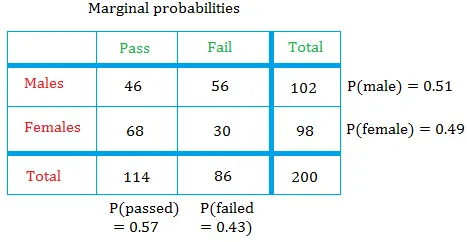




So, the joint model that uses $z$ variables to explain $x$ is defined by:

$$
p(x,z) = p(z|x)p(x)\\
\frac{p(x,z)}{p(x)} = p(z|x)
$$

But again, we find the $p(x)$ term at the bottom

To solve this we define $q(z|x)$ to approximate $p(z|x)$. $q$ is called the approximate posterior and $p$ the true posterior

Now this is starting to look like something we can do with machine learning. We have a source ($p$) and a target ($q$). We can treat this as an optimization problem where we parametrize $q$ (ie: a neural network) to try to get close to $p$ via gradient descent.

This is called variational inference (in general).

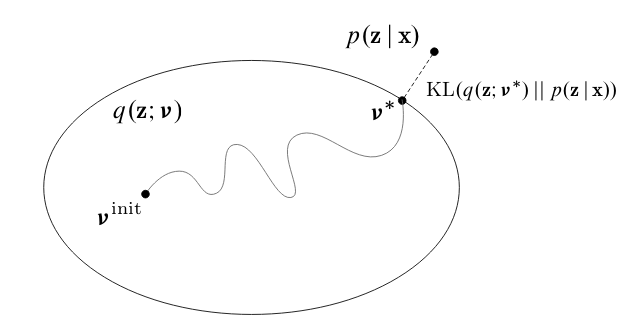

### KL divergence definition

The distance to minimize is called the KL divergence.
When we minimize the KL divergence, our $q$ will be an estimator of $p$.

This is the definition for the KL divergence between two distributions P, Q:

$$
D_{KL}(Q||P) = \sum Q \log \frac{Q}{P}
$$

We'll replace Q, P with our distributions $P = p(z|x)$ and $Q = q(z|x)$
$$
D_{KL}(q(z|x)||p(z|x)) = \sum q(z|x) \log \frac{q(z|x)}{p(z|x)}
$$

#### Sidenote about probability notation
I know using notation like $p(x)$ is confusing for those new to probability theory, but it is just a placeholder that stands for any distribution we want.
For example, $p(x)$ can be a Normal distribution, or a poisson, or any of the dozens of distributions available. It makes the math easier to manipulate simple letters with a few properties from probability theory

### ELBO derivation from KL(Q||P)
So, let's just play around with KL to see what comes out of the other end

\begin{align}
D_{KL}(q(z|x)||p(z|x)) &= \sum q(z|x) \log \frac{q(z|x)}{p(z|x)}\\
&= -\sum q(z|x) \log \frac{p(z|x)}{q(z|x)}\\
&= -\sum q(z|x)  \left[\log p(z|x) - \log q(z|x) \right]\\
&= -\sum q(z|x) \left[\log \frac{p(x|z)p(z)}{p(x)} - \log q(z|x) \right]\\
&= -\sum q(z|x) \left[\log p(x|z) + \log p(z) - \log p(x) - \log q(z|x) \right]\\
&= \sum q(z|x) \left[-\log p(x|z) - \log p(z) + \log p(x) + \log q(z|x) \right]\\
D_{KL}(q(z|x)||p(z|x)) - \sum q(z|x) \left[-\log p(x|z) - \log p(z) + \log q(z|x) \right] &= \log p(x)\\
-\sum q(z|x) \left[-\log p(x|z) + \log \frac{q(z|x)}{p(z)} \right] &= \\
-\mathbb{E}_{z \sim q(z|x)} \left[-\log p(x|z) + \log \frac{q(z|x)}{p(z)} \right] &=\\
-\mathbb{E}_{q} \left[-\log p(x|z) + \log \frac{q(z|x)}{p(z)} \right] &=\\
\mathbb{E}_{q} \left[\log p(x|z) - \log \frac{q(z|x)}{p(z)} \right] &=\\
D_{KL}(q(z|x)||p(z|x)) + \left[ \mathbb{E}_{q} \log p(x|z)  - \mathbb{E}_{q}  \log \frac{q(z|x)}{p(z)} \right] &= \log p(x)\\
\end{align}

### Neural network loss
To maximize the ELBO, we can minimize the negative of the ELBO.

$$
\max \mathbb{E}_{q} \log p(x|z)  - \mathbb{E}_{q}  \log \frac{q(z|x)}{p(z)} =
\min  - [\mathbb{E}_{q} \log p(x|z)  - \mathbb{E}_{q}  \log \frac{q(z|x)}{p(z)}]
$$

### Monte carlo loss
\begin{align}
-\mathbb{E}_{q} \log p(x|z)  + \mathbb{E}_{q}[ \log q(z|x) - \log p(z)]&= \\
\mathbb{E}_{q}[ \log q(z|x) - \log p(z)] - \mathbb{E}_{q} \log p(x|z)&=
\end{align}


The end result is:

\begin{align}
D_{KL}(q(z|x)||p(z|x)) + \left[ \mathbb{E}_{q} \log p(x|z)  - \mathbb{E}_{q}  \log \frac{q(z|x)}{p(z)} \right] &= \log p(x)
\end{align}


The first term is the original $D_{KL}$ we want to minimize, ($D_{KL}(q(z|x)||p(z|x))$). The second term is called the variational lower bound (ELBO).

$$
\max \mathcal{L} = \mathbb{E}_{q} \log p(x|z)  - \mathbb{E}_{q}  \log \frac{q(z|x)}{p(z)}
$$

Since $\log p(x)$ is a constant, and we want to minimize the $D_{KL}$ term, we can achieve the same by maximizing the ELBO.


So, the end goal is to minimize this function:

$$
\color{red}{\min \mathbb{E}_{q}[ \log q(z|x) - \log p(z)]} - \color{blue}{\mathbb{E}_{q} \log p(x|z)}
$$

### Other implementations
Here's where a disconnect might happen. For most tutorials, the tutorials assume that $p(z)$ (the prior) is gaussian and also assumes that $p(z|x)$ is also gaussian.

So, most tutorials end up with a KL divergence that looks like:

$$
-0.5 \sum{1 + \log{(\sigma)} - \mu^2 - e^{\log{(\sigma)}}} 
$$


But in our case, we won't do that because we want to retain the flexibility to modify distributions as needed.

And since we don't know the KL between all possible pairs of distributions, we'll actually just use monte-carlo sampling for this.

Recall that:
$$
\mathbb{E}_p = \frac{1}{N}\sum_{}p(x)
$$

So, anywhere we see $\mathbb{E}_q$ we will draw a sample from q and use it in the formula.

#### kl divergence

Next we'll define the second term of the loss which is the KL divergence.

Now, we don't want to compute the KL divergence analytically, so we'll instead use the monte carlo estimate.

$$
= \mathbb{E}_{q}  \log \frac{q(z|x)}{p(z)}\\
= \mathbb{E}_{q} [\log q(z|x) - \log{p(z)}]
$$

To code this, we'll need to be able to get the probability of z under each of $p(z)$ and $q(z|x)$.

This means we don't need to know what the distribution is, but only sample from it.


In [1]:
# !pip install --quiet lightning-bolts
# !pip install --quiet pytorch-lightning

# Full Implementation


In [1]:
from matplotlib.pyplot import imshow, figure
import numpy as np
from pytorch_lightning.callbacks import ModelCheckpoint
from torchvision.utils import make_grid
from pl_bolts.transforms.dataset_normalizations import cifar10_normalization
import torch
import pytorch_lightning as pl
from torch import nn
import matplotlib.pyplot as plt
from torch.nn import functional as F
from pl_bolts.models.autoencoders.components import (
    resnet18_decoder, resnet18_encoder)

/home/sushovan/.local/lib/python3.8/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/sushovan/.local/lib/python3.8/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/sushovan/.local/lib/python3.8/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/home/sushovan/.local/lib/python3.8/site-packages/pl_bolts/models/self_supervised/amdim/amdim_mod

In [2]:
class VAE(pl.LightningModule):
    def __init__(self, enc_out_dim=512, latent_dim=256, input_height=32):
        super().__init__()

        self.save_hyperparameters()

        # encoder, decoder
        self.encoder = resnet18_encoder(False, False)
        self.decoder = resnet18_decoder(
            latent_dim=latent_dim,
            input_height=input_height,
            first_conv=False,
            maxpool1=False
        )

        # distribution parameters
        self.fc_mu = nn.Linear(enc_out_dim, latent_dim)
        self.fc_var = nn.Linear(enc_out_dim, latent_dim)

        # for the gaussian likelihood
        self.log_scale = nn.Parameter(torch.Tensor([0.0]))


    def reparameterize(self, mu, logvar):
        """
        Reparameterization trick to sample from N(mu, var) from
        N(0,1).
        :param mu: (Tensor) Mean of the latent Gaussian [B x D]
        :param logvar: (Tensor) Standard deviation of the latent Gaussian [B x D]
        :return: (Tensor) [B x D]
        """
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        x_encoded = self.encoder(x)
        mu, logvar = self.fc_mu(x_encoded), self.fc_var(x_encoded)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

    def loss_function(self, recons ,input, mu, log_var):
        """
        Computes the VAE loss function.
        KL(N(\mu, \sigma), N(0, 1)) = \log \frac{1}{\sigma} + \frac{\sigma^2 + \mu^2}{2} - \frac{1}{2}
        :param args:
        :param kwargs:
        :return:
        """

        recons_loss =F.mse_loss(recons, input)

        kld_loss = torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim = 1), dim = 0)

        loss = recons_loss + kld_loss
        return {'loss': loss, 'Reconstruction_Loss':recons_loss.detach(), 'KLD':-kld_loss.detach()}



    def training_step(self, batch, batch_idx):
        x, _ = batch

        x_hat, mean, logvar = self.forward(x)

        total_loss = self.loss_function(x_hat,x,mean,logvar)

        return total_loss['loss']

    def validation_step(self, batch, batch_idx):
        x, _ = batch
        x_hat, mean, logvar = self.forward(x)
        total_loss = self.loss_function(x_hat,x,mean,logvar)
        self.log('val_loss', total_loss['loss'], on_step=True, on_epoch=True, prog_bar=True)


    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=1e-4)


Let's use CIFAR-10 already split up and transformed.

The Lightning Datamodule has 3 dataloaders, train, val, test

In [3]:
from pl_bolts.datamodules import CIFAR10DataModule

datamodule = CIFAR10DataModule(batch_size=128)

Now we train!

In [4]:
pl.seed_everything(42)


vae = VAE()

checkpoint_callback = ModelCheckpoint(
    dirpath = 'checkpoints',
    filename = 'BestVAE',
    save_top_k = 1,
    verbose = True,
    monitor = 'val_loss',
    mode = 'min'
)


trainer = pl.Trainer(accelerator='gpu',
                     devices=-1,
                     max_epochs=30,
                     check_val_every_n_epoch=5,
                     callbacks=[checkpoint_callback],
                    )

Global seed set to 42
/tmp/ipykernel_59037/2996977890.py:8: UnderReviewWarning: The feature resnet18_encoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  self.encoder = resnet18_encoder(False, False)
/home/sushovan/.local/lib/python3.8/site-packages/pl_bolts/models/autoencoders/components.py:334: UnderReviewWarning: The feature ResNetEncoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  return ResNetEncoder(EncoderBlock, [2, 2, 2, 2], first_conv, maxpool1)
/home/sushovan/.local/lib/python3.8/site-packages/pl_bolts/m

In [5]:
trainer.fit(model=vae, datamodule=datamodule)

Files already downloaded and verified
Files already downloaded and verified


/home/sushovan/.local/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type          | Params
------------------------------------------
0 | encoder | ResNetEncoder | 11.2 M
1 | decoder | ResNetDecoder | 8.6 M 
2 | fc_mu   | Linear        | 131 K 
3 | fc_var  | Linear        | 131 K 
------------------------------------------
20.1 M    Trainable params
0         Non-trainable params
20.1 M    Total params
80.228    Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/home/sushovan/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/home/sushovan/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  23%|██▎       | 73/313 [00:30<01:38,  2.43it/s, loss=0.153, v_num=4]

/home/sushovan/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


## Load the Best Model from Checkpoint

In [ ]:
cppath = 'checkpoints/BestVAE.ckpt'
checkpoint = torch.load(cppath)
vae.load_state_dict(checkpoint['state_dict'])

## Plot an image

In [ ]:
def generate_images():

    figure(figsize=(8, 3), dpi=300)

    # Z COMES FROM NORMAL(0, 1)
    num_preds = 16
    rand_v = torch.rand(num_preds, vae.hparams.latent_dim)
    p = torch.distributions.Normal(torch.zeros_like(rand_v), torch.ones_like(rand_v))
    z = p.rsample()
    
    vae.eval()

    # SAMPLE IMAGES
    with torch.no_grad():
        pred = vae.decoder(z.to(vae.device)).cpu()

    # UNDO DATA NORMALIZATION
    # normalize = cifar10_normalization()
    # mean, std = np.array(normalize.mean), np.array(normalize.std)
    img = make_grid(pred).permute(1, 2, 0).numpy() # * std + mean

    # PLOT IMAGES
    plt.imshow(img)
    plt.axis('off')
    plt.show()

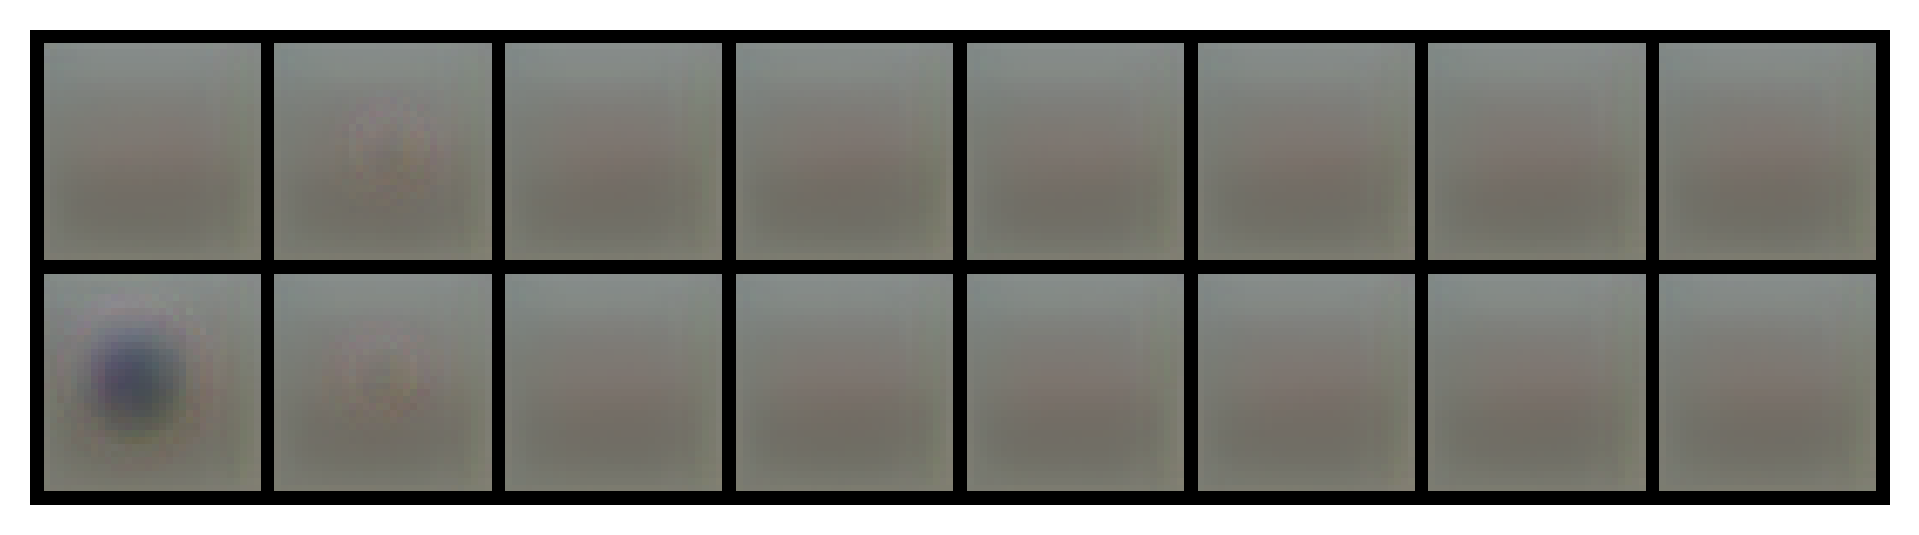

In [ ]:
generate_images()

In [ ]:
def generateimg():
    rand_v = torch.rand(1, vae.hparams.latent_dim)
    p = torch.distributions.Normal(torch.zeros_like(rand_v), torch.ones_like(rand_v))
    z = p.rsample()
    # SAMPLE IMAGES
    vae.eval()
    with torch.no_grad():
        pred = vae.decoder(z.to(vae.device)).cpu()
        
    img = make_grid(pred).permute(1, 2, 0).numpy()

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()


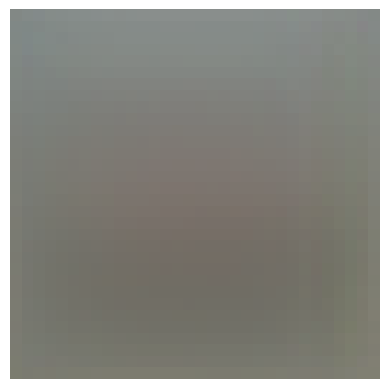

In [ ]:
generateimg()